In [1]:
#Initialization
%matplotlib inline
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
#Mathematical constants
pi = np.pi
tpi = 2.0*pi
fpi = 4.0*pi
zI = 1.0j
#Physical constants
#https://ja.wikipedia.org/wiki/%E5%8E%9F%E5%AD%90%E5%8D%98%E4%BD%8D%E7%B3%BB
aB = 0.0529177210903 #nanometer
Hartree = 27.211386245988 #eV
Atomtime = 0.024188843265857 #fs
Atomfield = Hartree/aB #V/nm
#https://ja.wikipedia.org/wiki/%E5%BE%AE%E7%B4%B0%E6%A7%8B%E9%80%A0%E5%AE%9A%E6%95%B0
sol = 137.035999084 #speed of light
ch = 1241.5 #eV * nm
chbar = 197.3 # eV * nm
halfepsc = 3.509e16 # W/cm^2 \frac{1}{2}*\epsilon_0 * c
Atomfluence = halfepsc*Atomtime*1.0e-15 # J/cm^2 ,W/cm^2 * fs = femto J/cm^2

$$\epsilon = 1 + \chi$$

In [2]:
def Pt2at(tt,Pt):
    dt = tt[1] - tt[0]
    jt = 0.0*Pt
    at = 0.0*Pt
    NT = np.size(Pt)
    for it in range(1,NT-1):
        jt[it] = (Pt[it+1]-Pt[it-1])/(2.0*dt)
    jt[0] = 2.0*jt[1] - jt[2]
    jt[NT-1] = 2.0*jt[NT-2] - jt[NT-3]
    for it in range(1,NT-1):
        at[it] = (jt[it+1]-jt[it-1])/(2.0*dt)
    at[0] = 2.0*at[1] - at[2]
    at[NT-1] = 2.0*at[NT-2] - at[NT-3]
    return at

In [3]:
def Make_Et(NT,dt,E0,Tpulse,omegac,CEP,nenvelope):
    if (tt[NT-1] < Tpulse):
        print('Tpulse'+str(Tpulse)+'is too short for this simulation.')
    for it in range(NT):
        if (tt[it] < Tpulse):
            At[it] = (E0/omegac)*(np.sin(pi*tt[it]/Tpulse))**nenvelope*np.cos(omegac*(tt[it]-0.5*Tpulse)+CEP)
    for it in range(1,NT-1):
        Et[it] = (At[it+1] - At[it-1])/(2.0*dt)
    Et[0] = 2.0*Et[1] - Et[2]
    Et[NT-1] = 2.0*Et[NT-2] - Et[NT-3]
    return Et

In [4]:
def Et2Pt(chi,Et):
    Pt = 0.0*Et
    Nchi = np.size(chi)
    for ichi in range(Nchi):
        Pt = Pt + chi[ichi]*Et**(ichi+1)
    return Pt

In [5]:
def PlotPtat(tt,Et,Pt):
    at = Pt2at(tt,Pt)
    ddEt = Pt2at(tt,Et)
# Plot Pt
    plt.figure()
    plt.xlabel('Time [fs]',fontsize = 12)
    plt.ylabel('Polarization [a.u.]',fontsize = 12)
    plt.fill(tt*Atomtime,Et*np.amax(Pt)/np.amax(Et),'k',alpha=0.4)
    plt.plot(tt*Atomtime,Pt,'g')
    plt.show()
# Plot at
    plt.figure()
    plt.xlabel('Time [fs]',fontsize = 12)
    plt.ylabel('Acceleration [a.u.]',fontsize = 12)
    plt.fill(tt*Atomtime,ddEt*np.amax(at)/np.amax(ddEt),'k',alpha=0.4)
    plt.plot(tt*Atomtime,at,'g')
    plt.show()
    return at, ddEt

In [6]:
def PlotPFaF(tt,Et,ddEt,Pt,at,omegac):
    omega = np.fft.fftfreq(NT)*(tpi/dt)
    PF = np.fft.fft(Pt)
    EF = np.fft.fft(Et)
    aF = np.fft.fft(at)*1.0e3
    ddEF = np.fft.fft(ddEt)
    plt.figure()
    plt.xlim(0.0,20.0)
    plt.xlabel('Harmonic order ['+str(omegac*Hartree)+' eV]',fontsize = 12)
    plt.ylabel('$|P(\omega)|$',fontsize = 12)
    plt.yscale('log')
    plt.fill(omega[:NT//2]/omegac,np.abs(EF[:NT//2])*np.amax(np.abs(PF[:NT//2]))/np.amax(np.abs(EF[:NT//2])),'k',alpha=0.4)
    plt.plot(omega[:NT//2]/omegac,np.abs(PF[:NT//2]),'g')
    plt.grid()
    plt.show()
    plt.figure()
#
    plt.xlim(0.0,20.0)
    plt.ylim(1.0e-8,5.0e-1)
    plt.xlabel('Harmonic order ['+str(omegac*Hartree)+' eV]',fontsize = 12)
    plt.ylabel('$|P(\omega)|$',fontsize = 12)
    plt.yscale('log')
    plt.fill(omega[:NT//2]/omegac,np.abs(ddEF[:NT//2])*np.amax(np.abs(aF[:NT//2]))/np.amax(np.abs(ddEF[:NT//2])),'k',alpha=0.4)
    plt.plot(omega[:NT//2]/omegac,np.abs(aF[:NT//2]),'g')
    plt.grid()
    plt.show()

In [7]:
#System parameters
Nchi = 20
chi = np.zeros(Nchi,dtype='float64')
chi[0] = 4
chi[1] = 1.0e1
chi[2] = 4.0e3
chi[3] = 1.0e5
chi[4] = 4.0e7
chi[5] = 2.0e9
chi[6] = 4.0e12
chi[7] = 4.0e14

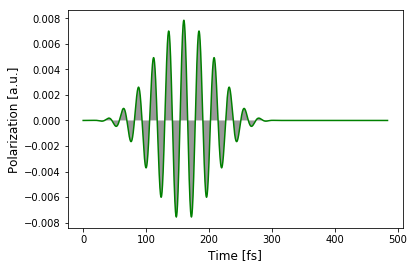

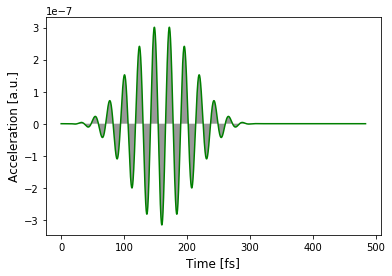

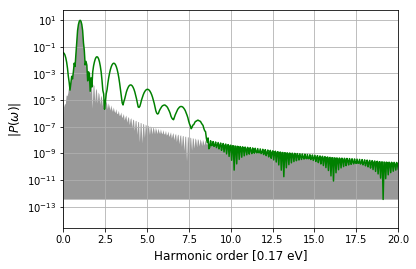

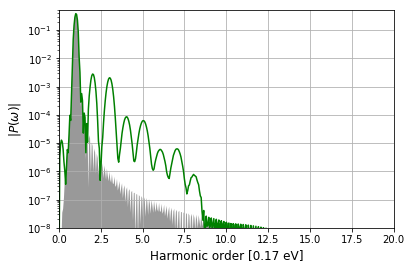

In [8]:
#Pt = chi1*Et + chi2*Et**2 + chi3*Et**3 + chi4*Et**4 + chi5*Et**5 + chi6*Et**6 + chi7*Et**7 + chi8*Et**8
#Set up
NT = 10000
dt = 2.0
tt = np.arange(0,NT*dt,dt,dtype='float64')
At = np.zeros(NT,dtype='float64')
Et = np.zeros(NT,dtype='float64')
E0 = 1.0/Atomfield      #1.0 V/nm
Tpulse = 320.0/Atomtime #320 fs
omegac = 0.17/Hartree   #0.17 eV
CEP = 0.75*tpi          #
nenvelope = 4
Et = Make_Et(NT,dt,E0,Tpulse,omegac,CEP,nenvelope)
Pt = Et2Pt(chi,Et)
at, ddEt = PlotPtat(tt,Et,Pt)
PlotPFaF(tt,Et,ddEt,Pt,at,omegac)


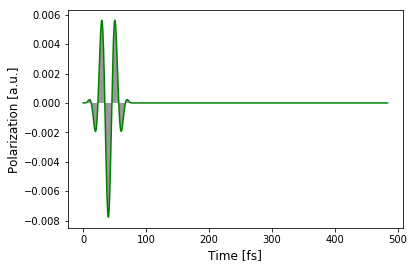

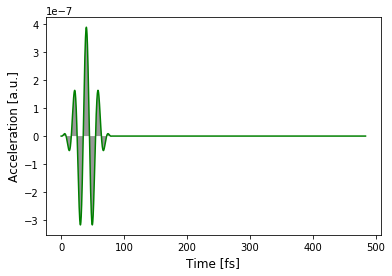

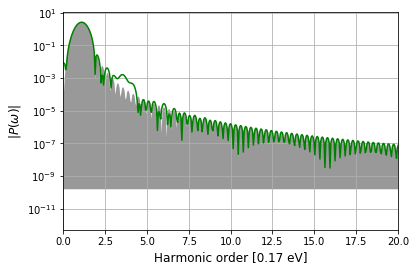

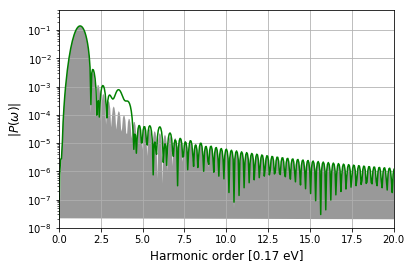

In [9]:
#Set up
NT = 10000
dt = 2.0
tt = np.arange(0,NT*dt,dt,dtype='float64')
At = np.zeros(NT,dtype='float64')
Et = np.zeros(NT,dtype='float64')
E0 = 1.0/Atomfield      #1.0 V/nm
Tpulse = 80.0/Atomtime #100 fs
omegac = 0.17/Hartree   #1.55 eV
CEP = 0.25*tpi          #
nenvelope = 4
Et = Make_Et(NT,dt,E0,Tpulse,omegac,CEP,nenvelope)
Pt = Et2Pt(chi,Et)
at, ddEt = PlotPtat(tt,Et,Pt)
PlotPFaF(tt,Et,ddEt,Pt,at,omegac)

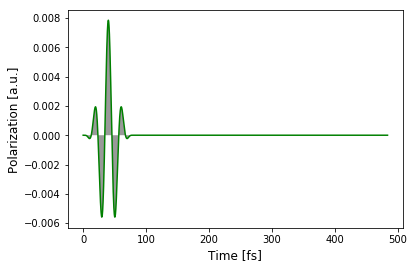

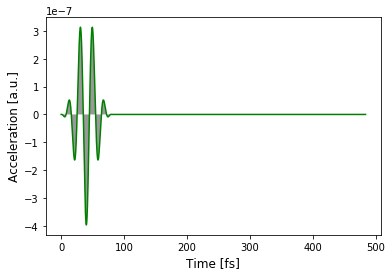

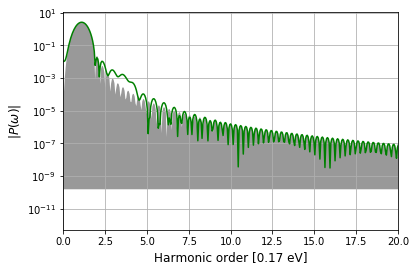

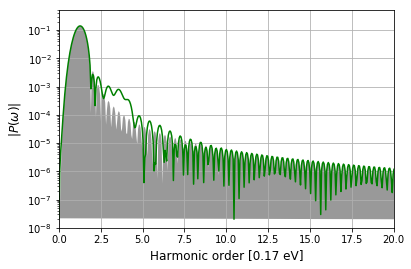

In [10]:
#Set up
NT = 10000
dt = 2.0
tt = np.arange(0,NT*dt,dt,dtype='float64')
At = np.zeros(NT,dtype='float64')
Et = np.zeros(NT,dtype='float64')
E0 = 1.0/Atomfield      #1.0 V/nm
Tpulse = 80.0/Atomtime #100 fs
omegac = 0.17/Hartree   #1.55 eV
CEP = 0.75*tpi          #
nenvelope = 4
Et = Make_Et(NT,dt,E0,Tpulse,omegac,CEP,nenvelope)
Pt = Et2Pt(chi,Et)
at, ddEt = PlotPtat(tt,Et,Pt)
PlotPFaF(tt,Et,ddEt,Pt,at,omegac)